In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
class LinearRegression:
    def __init__(self, learning_rate=0.0001, n_iters=30000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            y_predicted = np.dot(X, self.weights) + self.bias

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted


In [3]:
class LinearRegressionWithSGD:
    def __init__(self, learning_rate=0.0001, n_iters=30000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # stochastic gradient descent
        for _ in range(self.n_iters, batch_size=5):
            # approximate y with linear combination of weights and x, plus bias
            y_predicted = np.dot(X, self.weights) + self.bias
            
            indexes = np.random.randint(0, len(X), batch_size) # random sample
        
            Xs = np.take(X, indexes)
            ys = np.take(y, indexes)
            y_predicted_s = np.take(y_predicted, indexes)
            
            # compute gradients
            dw = (1 / batch_size) * np.dot(Xs.T, (y_predicted_s - ys))
            db = (1 / batch_size) * np.sum(y_predicted_s - ys)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted


{'lr': 0.0001, 'n_iters': 30000, 'weights': array([ 0.53424952,  0.33346318, -0.00779044,  0.09959714,  0.2180196 ,
        0.06196114,  0.13746151,  0.00133901]), 'bias': 0.03227018649613295}
0    -1.288078
1    -0.919539
2    -1.007862
3    -0.795213
4    -1.324515
        ...   
92    0.873505
93    0.423971
94    1.621920
95    1.637418
96    1.469376
Name: lpsa, Length: 97, dtype: float64


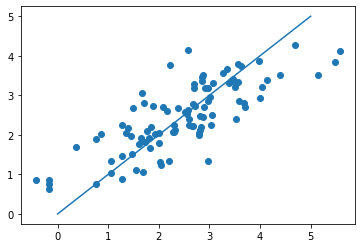

In [4]:
prostate = pd.read_table("prostate.data")
prostate.drop(prostate.columns[0], axis=1, inplace=True)

X = prostate.drop(["lpsa", "train"], axis=1)
y = prostate["lpsa"]

regressor = LinearRegression()

regressor.fit(X, y)
y_pred = regressor.predict(X)

print(regressor.__dict__)
print(y - y_pred)

plt.scatter(y, y_pred)
plt.plot([0, 5], [0, 5])
plt.show()

In [5]:
class LogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [6]:
heart = pd.read_csv("SAheart.data")
heart.famhist.replace(to_replace=['Present', 'Absent'], value=[1, 0], inplace=True)
heart.drop(['row.names'], axis=1, inplace=True)
X = heart.iloc[:, :-1]
y = heart.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
perf = sklearn.metrics.confusion_matrix(y_test, y_pred)
print("LR classification perf:\n", perf)

error_rate = np.mean(y_test != y_pred)
print("LR classification error rate:\n", error_rate)

LR classification perf:
 [[88  9]
 [40 16]]
LR classification error rate:
 0.3202614379084967
